In [ ]:
import os
import glob

In [ ]:
import sys

In [1]:
import numpy as np
import tables as tb
import pandas as pd

from invisible_cities.core import core_functions as coref

from lmfit.models import GaussianModel, LinearModel

from invisible_cities.io import mcinfo_io as mcio
from collections import defaultdict

In [2]:
import matplotlib        as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook
%matplotlib inline
### Useful parameters for plots
mpl.rcParams["figure.figsize"]          = 12,10
mpl.rcParams["font.size"]               = 20
mpl.rcParams["figure.max_open_warning"] = 100
mpl.rcParams["font.size"]               = 20
mpl.rcParams["font.weight"]             ='normal'
mpl.rcParams["axes.labelweight"] = "normal"
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['figure.facecolor'] = 'w';

In [51]:
infile = '/home/ander/Downloads/electricpotential-20000V.txt'

In [52]:
data = pd.read_csv(infile, skiprows=30, names=['X', 'Y', 'Z', 'V'], header=None, delimiter='\s')

/tmp/ipykernel_625461/2925936515.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(infile, skiprows=30, names=['X', 'Y', 'Z', 'V'], header=None, delimiter='\s')


In [53]:
lim = 0.0005
sel = coref.in_range(data.X, -lim, lim) & coref.in_range(data.Y, -lim, lim)

#plt.hist2d(data[sel].X, data[sel].Z, weights=data[sel].V, bins=50);
#plt.scatter(data[sel].X, data[sel].Z);
#plt.colorbar()

In [37]:
import scipy.stats as stats


In [54]:
zbins = np.linspace(0, 0.011, 21)
out = stats.binned_statistic(data[sel].Z, data[sel].V, 'mean', bins=zbins)

<Figure size 1200x1000 with 0 Axes>

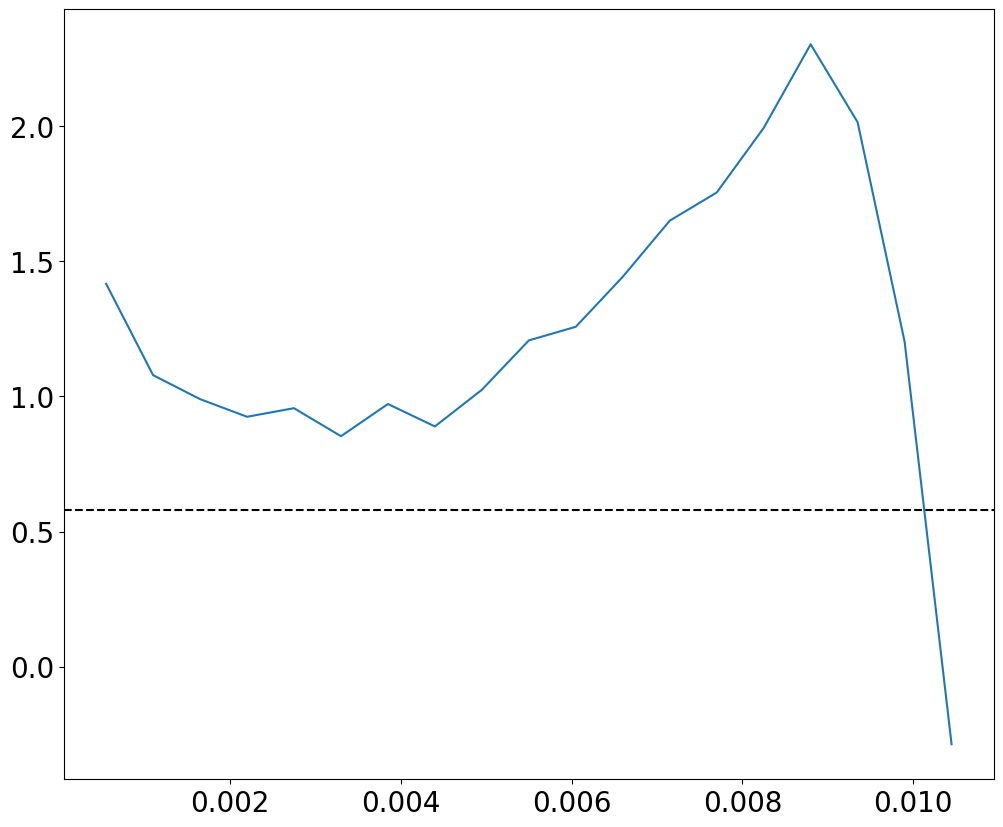

<Figure size 1200x1000 with 0 Axes>

In [55]:
zplot = coref.shift_to_bin_centers(zbins)
volts = out.statistic
#plt.plot(zplot, volts)
x,y = coref.shift_to_bin_centers(zplot), np.diff(volts)/np.diff((zplot*100))/8.5/1000
plt.plot(x, y)
plt.axhline(47/81,c='k', ls='--')
plt.figure()


<Figure size 1200x1000 with 0 Axes>

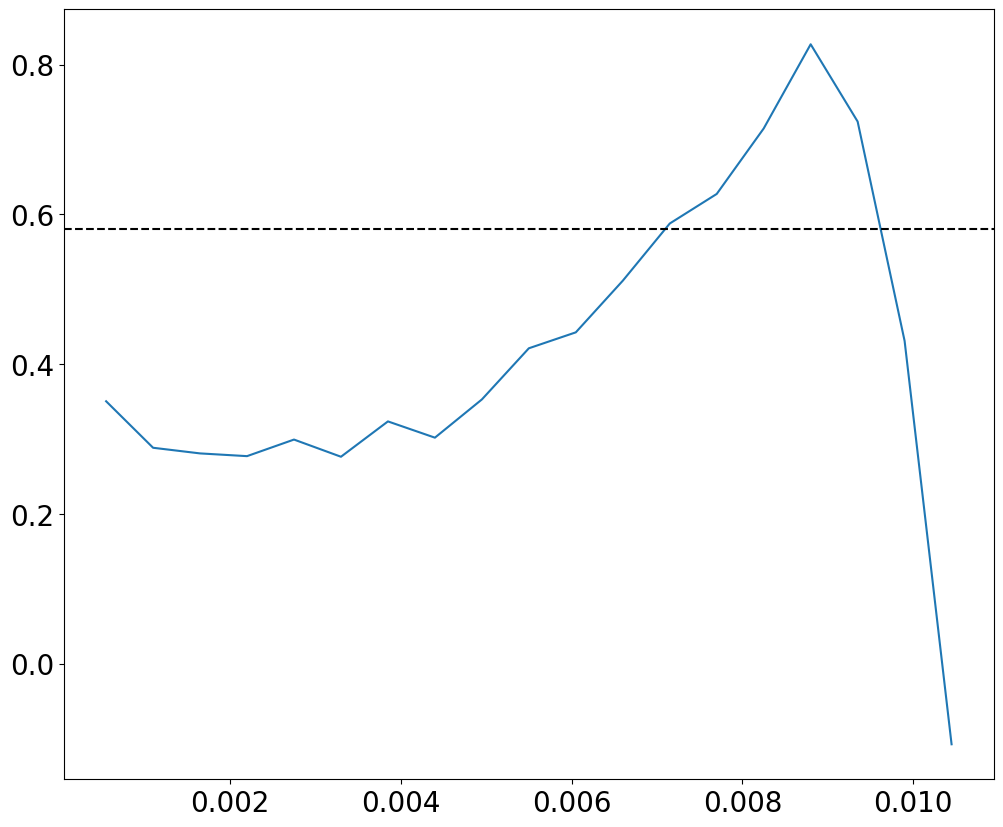

<Figure size 1200x1000 with 0 Axes>

In [50]:
zplot = coref.shift_to_bin_centers(zbins)
volts = out.statistic
#plt.plot(zplot, volts)
x,y = coref.shift_to_bin_centers(zplot), np.diff(volts)/np.diff((zplot*100))/8.5/1000
plt.plot(x, y)
plt.axhline(47/81,c='k', ls='--')
plt.figure()


In [28]:
d = data[sel]

In [30]:
d = d.sort_values(by='Z')

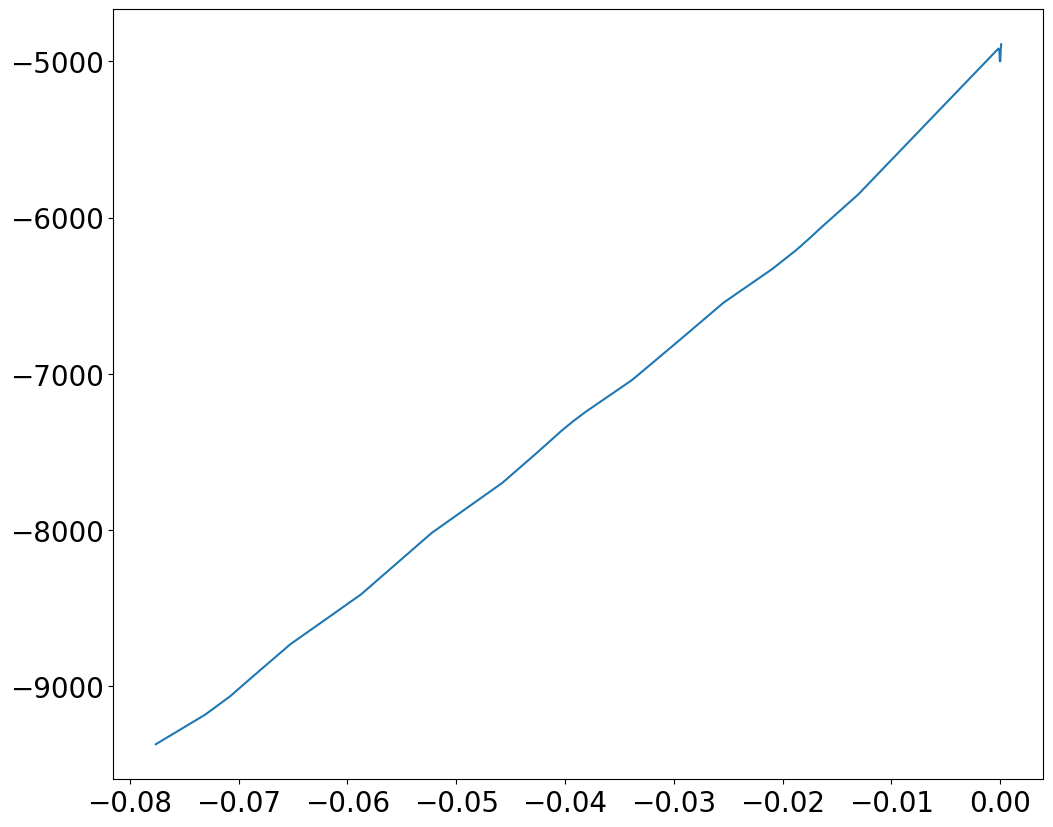

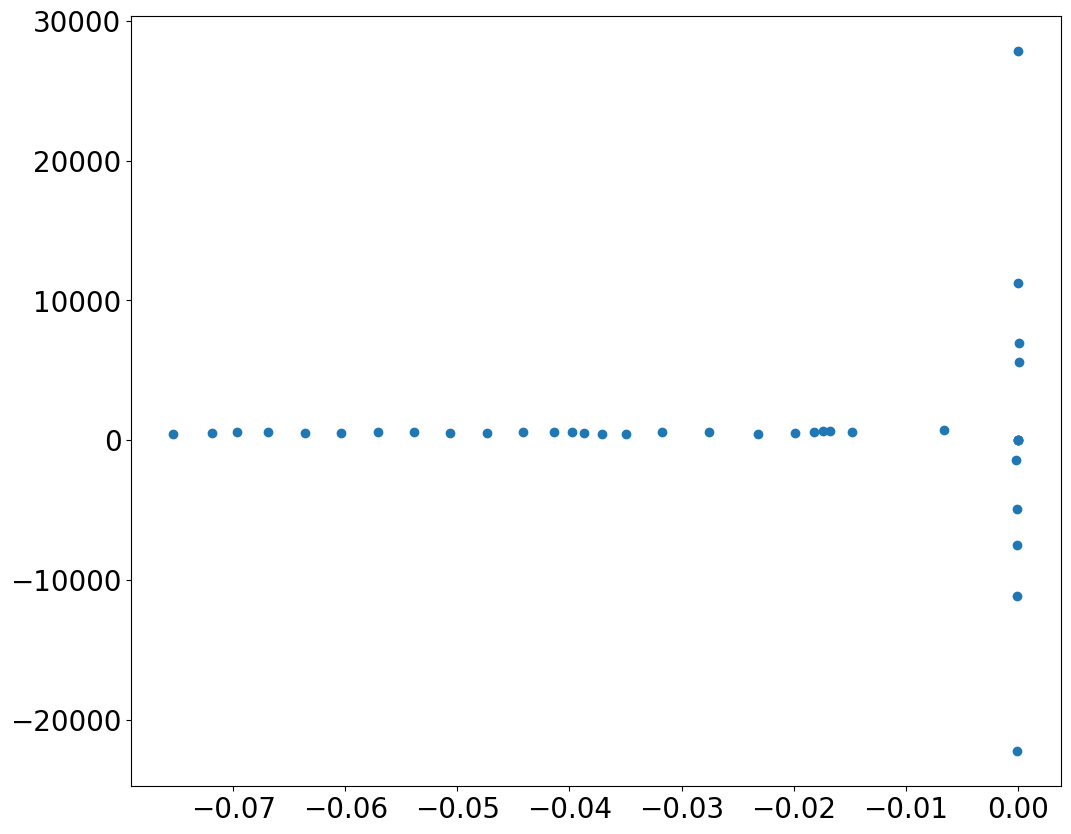

In [35]:
plt.plot(d.Z, d.V)
plt.figure()
x,y = coref.shift_to_bin_centers(d.Z), np.diff(d.V)/np.diff((d.Z*100))
plt.scatter(x, y)

In [27]:
len(data[sel])

39

In [14]:
len(data[sel])

15